# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Lecture 3 (*k*-NN and Linear Regression)

**Harvard University**<br>
**Summer 2021**<br>
**Instructors:** Kevin Rader<br>
**Authors:** Rahul Dave, David Sondak, Will Claybaugh, Pavlos Protopapas, Chris Tanner, Kevin Rader

---

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> $k$-NN</li>
<li> Linear Regression Basics </li>
<li> Model Accuracy and Comparison </li>
<li> Inference in Linear Regression </li>    

## Learning Goals

This Jupyter notebook accompanies Lecture 3. By the end of this lecture, you should be able to:

- Understand the basics of statistical modeling
- Perform predictions and interpret the results of *k*-NN and simple linear regression models
- Evaluate the accuracy and compare models 
- Perform basic inferences in linear regression models
- Be comfortable fitting and using models from both `sklearn` and `statsmodels`, when appropriate 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels as sm
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Part 0: Reading in and exploring the data

Two datasets are provided for this notebook which represent the train and test splits of some simplified data sets for performing regression modeling.  We would like to build models to predict `votergap` from the 2020 election (Biden-Trump) from `density` (population density in persons per square mile) where each row represents a county in the US. 

We start by reading in the datasets for you and creating the necessary $Y$ variables:

**Important note: use the training dataset for all exploratory analysis and model fitting.  Only use the test dataset to evaluate and compare models.**


In [3]:
train = pd.read_csv("../data/county_election_20_train.csv")
test = pd.read_csv("../data/county_election_20_test.csv")

votergap_train = 100*(train['biden_perc']-train['trump_perc'])
votergap_test = 100*(test['biden_perc']-test['trump_perc'])

train['votergap'] = votergap_train
test['votergap'] = votergap_test



**Q0.1:** Look at summary statistics and visuals to explore the distributions of the 2 variables of interest along with visualizing their association.  Briefly summarize what you notice.

In [4]:
######
# your code here
###### 
train[['density','votergap']].describe()

,density,votergap
count,2491.000000,2491.000000
mean,268.705379,-31.648500
std,1884.711742,31.558248
min,0.200000,-93.090909
25%,17.700000,-56.041734
50%,46.600000,-38.136710
75%,116.650000,-13.501772
max,69468.400000,80.525826


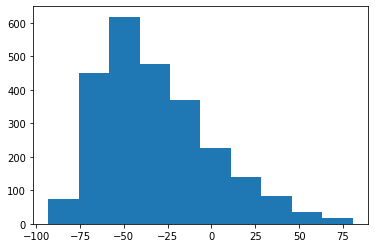

In [5]:
plt.hist(train['votergap'])
plt.show()

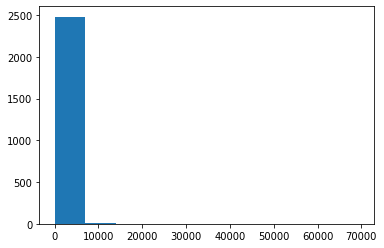

In [6]:
plt.hist(train['density'])
plt.show()

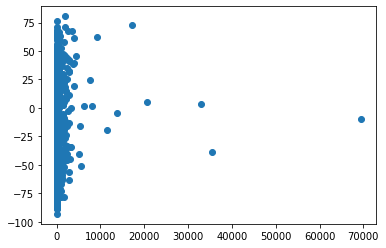

In [7]:
plt.scatter(train['density'],train['votergap'])
plt.show()

**Solution:**

The response, votergap, is moderately left-skewed, but not enough to be concerning of the appropriateness of linear regression.  Population density is extremely right-skewed (with a few outliers), and causes major issues in the appropriateness of linear regression when looking at the scatterplot.  Some sort of transformation (log-transforms work great for right-skewed distributions where the data are all positive, generally) may improve the situation...

Note: density is very right-skewed.  Let's consider using the log scale version:

**Q0.2:** Create the variable `log_density` using `np.log` and recreate the affected visuals from before.  Comment on the appropriateness of *k*-NN and linear regression using the log-transformed and untransformed versions of density.

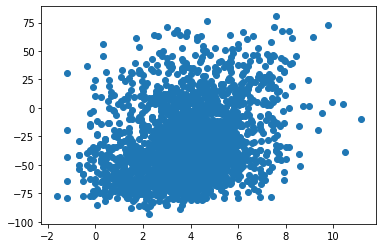

In [8]:
train['log_density'] = np.float64(np.log(train['density']))
test['log_density'] = np.float64(np.log(test['density']))
plt.scatter(train['log_density'],train['votergap'])
plt.show()

**Solution:**

This scatterplot looks much better: there is the possibility that a line may describe the general negative relationship here (though it is not perfectly linear, a linear model could still be useful): there will be spread both above and below a line and the influence of the outliers has been greatly reduced.

## Part 1: Fitting and using sklearn's k-NN model


### Fitting an k-NN model with k = 1

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(train['log_density'], train['votergap'])

#Note you will get an error message.  What does this tell you?

ValueError: Expected 2D array, got 1D array instead:
array=[2.43361336 5.7689458  2.18605128 ... 5.34041854 1.13140211 1.5040774 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Solution:**

The issue is that `sklearn` expects the predictor(s) to be in the form of a 2D array (aka, a matrix), but here we have a single predictor as a 1D array.  By using `array.reshape(-1, 1)`, we can force the vector into a matrix form.

In [14]:
#Let's fit the model appropriatelty 
knn1.fit(train['log_density'].values.reshape(-1, 1), train['votergap'])


KNeighborsRegressor(n_neighbors=1)

**Q1.1** Fit four more $k$-NN models: ones with $k = \{10, 50, 100, 500\}$ and save thus as consistently named objects.

In [15]:
######
# your code here
######


knn10 = KNeighborsRegressor(n_neighbors=10).fit(train['log_density'].values.reshape(-1, 1), train['votergap'])
knn50 = KNeighborsRegressor(n_neighbors=50).fit(train['log_density'].values.reshape(-1, 1), train['votergap'])
knn100 = KNeighborsRegressor(n_neighbors=100).fit(train['log_density'].values.reshape(-1, 1), train['votergap'])
knn500 = KNeighborsRegressor(n_neighbors=500).fit(train['log_density'].values.reshape(-1, 1), train['votergap'])


Predictions can be made and saved using the `sk.predict()` command, and the results can be interpretated by plotting the predictions on top of the scatterplot

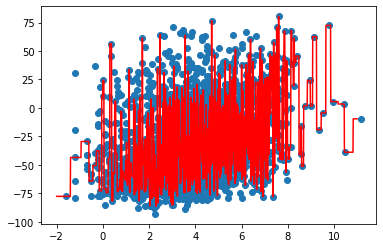

In [16]:


yhat1 = knn1.predict(train['log_density'].values.reshape(-1, 1))

x_dummy1 = np.arange(-2,11,0.01)
yhat_dummy1 = knn1.predict(x_dummy1.reshape(-1, 1))

plt.scatter(train['log_density'],train['votergap'])
plt.plot(x_dummy1,yhat_dummy1,c="r")
plt.show()

**Q1.2** Recreate the scatterplot above but with all five k-NN models presented.  Which of the five models do you think is most appropriate for predicting `votergap`?

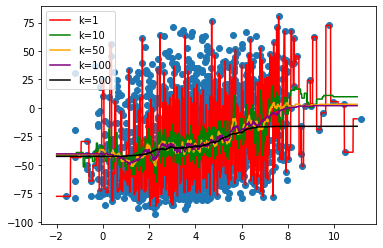

In [17]:
######
# your code here
######

x_dummy1 = np.arange(-2,11,0.01)
yhat_dummy10 = knn10.predict(x_dummy1.reshape(-1, 1))
yhat_dummy50 = knn50.predict(x_dummy1.reshape(-1, 1))
yhat_dummy100 = knn100.predict(x_dummy1.reshape(-1, 1))
yhat_dummy500 = knn500.predict(x_dummy1.reshape(-1, 1))

plt.scatter(train['log_density'],train['votergap'])
plt.plot(x_dummy1,yhat_dummy1,c="r",label="k=1")
plt.plot(x_dummy1,yhat_dummy10,c="g",label="k=10")
plt.plot(x_dummy1,yhat_dummy50,c="orange",label="k=50")
plt.plot(x_dummy1,yhat_dummy100,c="purple",label="k=100")
plt.plot(x_dummy1,yhat_dummy500,c="black",label="k=500")
plt.legend()
plt.show()

**Solution:**

This plot illustrates that the *k*-NN models for small values of *k* (1 and 10 for sure) are too complex and overfit to the training data, while a *k* of 500 does not describe the relationship specifc enough here (too flat at the extremes of $x$).  $k$ = 100 is probably the best choice.  But even when $k$ = 100, there is a little too much 'jumpiness' in the relationship: a value of $k$ between 100 and 500 may help in creating a model that better describes the relationship.


---

## Part 2: Linear Regression Basics 

In this section we will fit a linear model two ways: using both `sklearn` and `statmodels`.

First let's fit it using `sklearn`'s [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

In [18]:
from sklearn.linear_model import LinearRegression

regress = LinearRegression(fit_intercept=True).fit(train['log_density'].values.reshape(-1, 1), train['votergap'])

print("Beta0 =", regress.intercept_ ,", Beta1 =", regress.coef_)


Beta0 = -51.56651935005564 , Beta1 = [5.21615611]


**Q2.1** Plot the scatterplot with the fitted line.  Interpret the approriateness of a linear regression model from this plot.

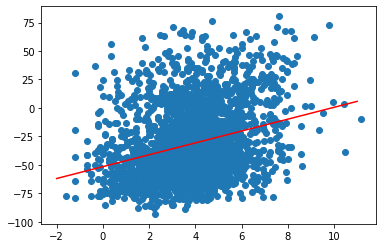

In [19]:
######
# your code here
######

yhat_dummy_regress = regress.predict(x_dummy1.reshape(-1, 1))

plt.scatter(train['log_density'],train['votergap'])
plt.plot(x_dummy1,yhat_dummy_regress,c="r",label="Linear Regression")

plt.show()


Next, let's use `statmodels`'s [linear_model.OLS](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html):

**Q2.2** Write down the estimated regression model here.  What is the predicted value for Middlesex County in Massachusetts (where Harvard resides)?

In [20]:
import statsmodels.regression.linear_model as lm

X = sm.tools.add_constant(train['log_density'])
model = lm.OLS(train['votergap'],X)
results = model.fit()
results.params

const         -51.566519
log_density     5.216156
dtype: float64

In [21]:
######
# your code here
######

train[((train['county']=="Middlesex County") & (train['state']=="Massachusetts"))]


,fips,biden_count,trump_count,totalvotes,biden_perc,trump_perc,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap16,trump16,clinton16,votergap,log_density
712,25017,617196,226956,869347,0.709954,0.261065,Massachusetts,25017,Middlesex County,1505006,7.759,19.699,51.186,4.0,84026,7.9,51.3,19.8,22.6,299.8,184.4,-38.152,28.171,66.323,44.888865,5.703116


In [22]:
# mathematicallky calculating y-hat
results.params['const']+results.params['log_density']*train.log_density[((train['county']=="Middlesex County") & (train['state']=="Massachusetts"))]

712   -21.818178
Name: log_density, dtype: float64

**Solution:**

The equation for the line is $\hat{y}_i = -51.57 + 5.216(x_i)$ where $\hat{y}_i$ is the predicted/estimated voter gap and $x_i$ is the measured population density on the log scale (base $e$). 

The predicted response is $\hat{y} = -21.82$ for Middlesex county (with `log_density` of $\ln(299.8)=5.703$).  This is way off: the observed votergap is $+44.89$.

**Q2.3** Does a linear regression model seem appropriate?

**Solution:**

Based on the scatterplot, a linear regression line is appropriate.  There are residuals both above and below the line no matter what value along the $x$-axis you consider.  However, there is a lot of scatter around the line, suggesting density (on the log scale) is not the only factor that may relate to `votergap`

## Part 3: Model Accuracy and Comparison 


sklearn provides a nice framework for calculating $R^2$ for a model using the `sk.score` function from the model:

In [23]:
print(knn1.score(train['log_density'].values.reshape(-1, 1),train['votergap']))

print(regress.score(train['log_density'].values.reshape(-1, 1),train['votergap']))


0.2507195737560455
0.08123061352251204


**Q3.1** Calculate the $R^2$ score for all models seen on the test set.  Which is the best choice of $k$ in $k$-NN (of those considered)?  Does this best $k$-NN outperform linear regression?

In [24]:
######
# your code here
######

knn1_test_r2 = knn1.score(test['log_density'].values.reshape(-1, 1),test['votergap'])
knn10_test_r2 = knn10.score(test['log_density'].values.reshape(-1, 1),test['votergap'])
knn50_test_r2 = knn50.score(test['log_density'].values.reshape(-1, 1),test['votergap'])
knn100_test_r2 = knn100.score(test['log_density'].values.reshape(-1, 1),test['votergap'])
knn500_test_r2 = knn500.score(test['log_density'].values.reshape(-1, 1),test['votergap'])
print(knn1_test_r2)
print(knn10_test_r2)
print(knn50_test_r2)
print(knn100_test_r2)
print(knn500_test_r2)

print(regress.score(test['log_density'].values.reshape(-1, 1),test['votergap']))

-0.6339905966248949
0.05513915722227458
0.09391555148934305
0.09478484410783083
0.08226797680806996
0.08022984594844473


**Solution**

Note: not surprisingly, $R^2$ is very low in the clearly overfit, more complex models (with $k=1$ and $k=10$); in fact, the $R^2$ are negative in the test set.  The best of these 5 considered models is $k=100$, and it outperforms linear regression ($R^2 = 0.948$ for $k$-NN with $k=100$ vs. $R^2 = 0.080$ for linear regression, both in test).

**Q3.2** Calculate MSE and $R^2$ manually from the linear regression model (in train).

*Note: the intention was for the train set, but both the test and train set calculations are shown below.*


In [25]:
######
# your code here
######

ybar_train = np.mean(train['votergap'])
ybar_test = np.mean(test['votergap'])

yhat_train = regress.predict(train['log_density'].values.reshape(-1, 1))
yhat_test = regress.predict(test['log_density'].values.reshape(-1, 1))

# sums of squares 'total': around the mean
SST_train = np.sum((train['votergap'] - ybar_train)**2)
SST_test = np.sum((test['votergap'] - ybar_test)**2)

# sums of squares 'error': around the predicted values
SSE_train = np.sum((train['votergap'] - yhat_train)**2)
SSE_test = np.sum((test['votergap'] - yhat_test)**2)

r2_train = 1 - (SSE_train/SST_train)
r2_test = 1 - (SSE_test/SST_test)

MSE_train = SSE_train/np.size(train['votergap'])
MSE_test = SSE_test/np.size(test['votergap'])

print("R-squared in train =",r2_train)
print("R-squared in test = =",r2_test)

print("MSE in train =",MSE_train)
print("MSE in test =",MSE_test)


# And to check with sklearn's functions:
print(sk.metrics.r2_score(train['votergap'], yhat_train))
print(sk.metrics.r2_score(test['votergap'], yhat_test))

print(sk.metrics.mean_squared_error(train['votergap'], yhat_train))
print(sk.metrics.mean_squared_error(test['votergap'], yhat_test))


R-squared in train = 0.08123061352251204
R-squared in test = = 0.08022984594844473
MSE in train = 914.6562211787476
MSE in test = 1053.468653046852
0.08123061352251204
0.08022984594844473
914.6562211787476
1053.468653046852


Note: not surprisingly, $R^2$ is lower and MSE is higher in the test set than the train set (indicates some overfitting).

## Part 4: Inference in Linear Regression 

`statsmodels` is definitely the way to go to for inferential calculations for linear regression models.  Use the output below to perform some interpretations:

In [26]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     220.1
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           9.07e-48
Time:                        09:35:29   Log-Likelihood:                -12027.
No. Observations:                2491   AIC:                         2.406e+04
Df Residuals:                    2489   BIC:                         2.407e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -51.5665      1.473    -35.003      0.000     -54.455     -48.678
log_density     5.2162      0.352     14.834      0.000       4.527       5.906
==============================================================================
Omnibus:                      211.913   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.821
Skew:                           0.789   Prob(JB):                     1.15e-58
Kurtosis:                       3.283   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Q4.1** Provide 95\% confidence intervals for $\beta_0$ and $\beta_1$.  Interpret the results.

The 95\% confidence intervals are (-54.46, -48.68) and (4.53, 5.91) for $\beta_0$ and  $\beta_1$, respectively.  The estimated average votergap for counties with a population density of 1 person per square mile (which is 0 on the log scale) is between 48.7 and 54.6 percentage points in favor of Trump.  For every one unit change on the log scale (a multiplicative increase of $e = 2.718$) of population density, the vote in favor of Biden over Trump increases somewhere between 4.53 and 5.91 percentage points, on average.  Since zero is not in this interval, this suggests that the association is a real one (from a statistical perspective).

**Q4.2** Perform a formal hypothesis test to determine whether votergap is significantly associated with population density (on the log scale).

Based on the output, to determine between $H_0:\beta_1=0$ and $H_A:\beta_1\neq 0$ , the $t$-test statistic is calculated to be 14.834, with a p-value of $p < 0.001$.  This is extremely significant (since $p$ is much less than 0.05), and this suggests that the votergap was truly positively associated with population density (on the log scale).

**Q4.3** Calculate the predicted values and residuals for the train set from the linear regression model.  Plot the histogram of residuals and residuals-vs.-predicted scatterplot.  Comment on the assumptions of the linear regression model 

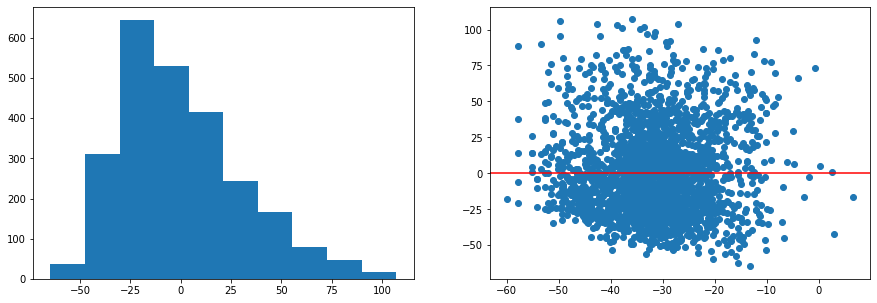

In [27]:
######
# your code here
######

fitted = regress.predict(train['log_density'].values.reshape(-1, 1))
residuals = train['votergap'] - fitted

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(residuals)
ax[1].scatter(fitted, residuals)
ax[1].axhline(y=0, c="red")

plt.show()


The residual histogram and scatterplot below illustrate that the assumptions are reasonable (even though the residuals are moderately right-skewed, there are not any extreme outliers).  The residual scatterplot does not show any clear non-linearities (curvature) or non-constant variance (sometimes called heteroscedasticity).  One thing this is slightly concerning in the residual scatterplot: there are no points in the lower left part of the plot (where $x=-55$ and $y=-50$ on the plot, for example): this is because it is impossible for a candidate to have more than 100% of the vote (thus the sum of $\hat{y}$, the predicted value, and $e$, the residual, are bounded between -100 and 100).

**Q4.4** *We won't have time for this* Perform a bootstrap approach to calculate the 95\% confidence intervals based on the method, and compare them to the probabilistic-based ones above from statsmodels.

In [28]:
######
# your code here
######

nboots = 1000
n = np.size(train['votergap'])
np.random.seed(109)
beta1_boots = []

for boot in np.arange(nboots):
    indices = np.random.choice(n,size=n,replace=True)
    y_boot = train['votergap'].iloc[indices]
    x_boot = train['log_density'].iloc[indices].values.reshape(-1, 1)
    regress_boot = LinearRegression(fit_intercept=True).fit(x_boot, y_boot)
    beta1_boot = regress_boot.coef_[0]
    beta1_boots.append(beta1_boot)

The empirical bootstrap 95% confidence interval for the slope is: [4.39546215 5.9444841 ]


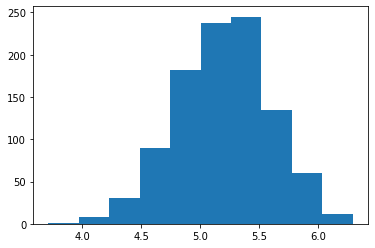

In [29]:
print("The empirical bootstrap 95% confidence interval for the slope is:",np.quantile(beta1_boots,[0.025,0.975]))

plt.hist(beta1_boots)
plt.show()

**Solutions:**

The bootstrap confidence interval is (4.40, 5.94) while the standard $t$-based confidence interval is (4.53, 5.91): they are very similar to each other (centered in a similar place, the bootstrap interval is slightly wider) and the difference in widths is likely due to the outliers in the upper left and lower right of the original scatterplot adding extra variabilitiy into the bootstrap approach (sometimes they are not included in the bootstrap resample while sometimes they are included multiple times).